In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

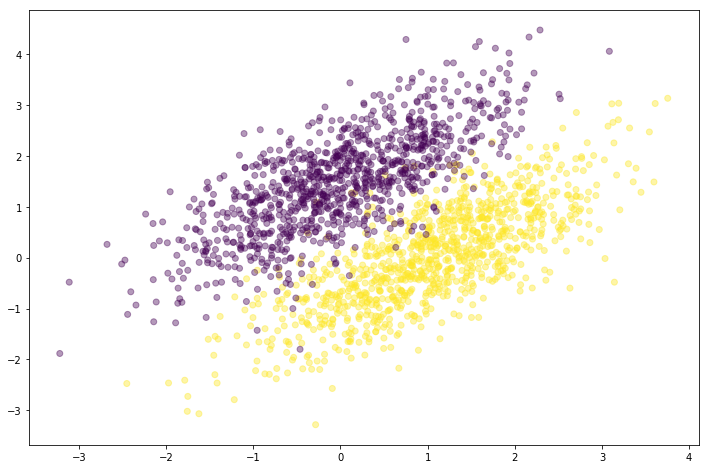

In [2]:
#Training Dataset
np.random.seed(12)
mean1 = [1, 0]
cov1 = [[1, 0.75], [0.75, 1]]
x1= np.random.multivariate_normal(mean1, cov1, 1000)
mean2 = [0, 1.5]
cov2 = [[1, 0.75], [0.75, 1]]  
x2 = np.random.multivariate_normal(mean2, cov2, 1000)
train_data=np.vstack((x1,x2)).astype(np.float32)
train_label = np.hstack(((np.ones(1000)),(np.zeros(1000))))
#plot in graph
plt.figure(figsize=(12,8))
plt.scatter(train_data[:, 0], train_data[:, 1],
            c = train_label, alpha = .4)

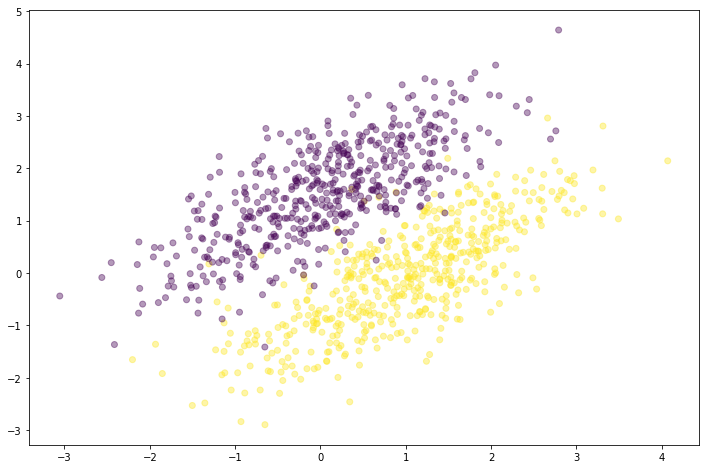

In [3]:
#Test data
mean1 = [1, 0]
cov1 = [[1, 0.75], [0.75, 1]]  
xt1 = np.random.multivariate_normal(mean1, cov1, 500)
mean2 = [0, 1.5]
cov2 = [[1, 0.75], [0.75, 1]]  
xt2= np.random.multivariate_normal(mean2, cov2, 500)
test_data=np.vstack((xt1,xt2)).astype(np.float32)
test_label = np.hstack(((np.ones(500)),(np.zeros(500))))
#plot in graph
plt.figure(figsize=(12,8))
plt.scatter(test_data[:, 0], test_data[:, 1],
            c = test_label, alpha = .4)

In [4]:
#Sigmoid function
def sigmoid(scores):
    return(1/(1+np.exp(-scores)))

In [5]:
#cross Entropy 
def cross_entropy(sig_line,target):
    cost1=-target*np.log(sig_line)
    cost2=(1-target)*np.log(1-sig_line)
    cost3=cost1-cost2
    cost=cost3.sum()/len(target)
    return(cost)

In [6]:
#calucluate accuracy and Run test set
def accuracy(train_data, weights,train_label):
    with_intercept = np.hstack((np.ones((train_data.shape[0], 1)),train_data))
    final_scores = np.dot(with_intercept, weights)
    preds = np.round(sigmoid(final_scores))
    print ('Accuracy from scratch: {0}'.format((preds == train_label).sum().astype(float) / len(preds)))
    return(preds)

In [7]:
#Roc Curve building & ploting 
def Roc_curve(y_pred, y_true):
    matrix=confusion_matrix(y_true, y_pred)
    True_Positive=matrix[0][0]
    False_Positive=matrix[0][1]
    False_Negative=matrix[1][0]
    True_Negative=matrix[1][1]
    True_positive_rate = True_Positive/(True_Positive+False_Negative) #TRUE POSITIVE RATE
    False_positive_rate = False_Positive/(False_Positive+True_Negative) #FALSE POSITIVE RATE
    ACC = (True_Positive+True_Negative)/(True_Positive+False_Positive+False_Negative+True_Negative) #ACCURACY
    print("Accuracy  :",ACC)
    fpr = [0.0, False_positive_rate, 1.0]
    tpr = [0.0, True_positive_rate, 1.0]
    auc_area = metrics.auc(fpr, tpr)
    #Plot graph
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)'%auc_area )
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [8]:
#Batch Training
def Batch_training(input_data,train_label,iteration,learning_rate):
    bias = np.ones((train_data.shape[0],1))
    input_data = np.hstack((bias, train_data))
    weights= np.ones(input_data.shape[1])
    error_history=[]
    error2=0
    for iterating  in range(iteration):
        scores = np.dot(input_data, weights)
        sig_line=sigmoid(scores)
        error1=cross_entropy(sig_line, train_label)
        error_history.append(error1)
        if error1==error2:
            print('Iteration= '+str(iterating)+ " Cost= "+ str(error1))
            break
        error2=error1 
    gradient = np.dot(input_data.T, (scores-train_label))/train_label.size
    weights -= gradient*learning_rate
    return(weights)
    

Learning Rate=1
Iteration= 1 Cost= 1.5079169673734414
Weights=[-0.76576612 -1.21433115 -2.58130123]
Accuracy from scratch: 0.5925
Result on Test Data
Accuracy from scratch: 0.608
Roc Curve
Accuracy  : 0.5925


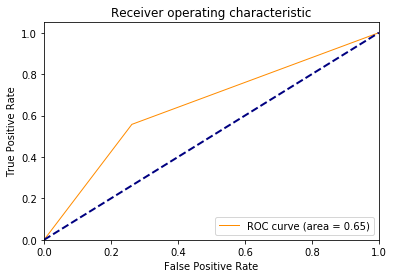

Learning Rate=0.1
Iteration= 1 Cost= 1.5079169673734414
Weights=[0.82342339 0.77856688 0.64186988]
Accuracy from scratch: 0.484
Result on Test Data
Accuracy from scratch: 0.478
Roc Curve
Accuracy  : 0.484


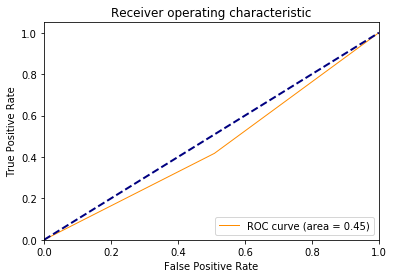

Learning Rate=0.01
Iteration= 1 Cost= 1.5079169673734414
Weights=[0.98234234 0.97785669 0.96418699]
Accuracy from scratch: 0.4745
Result on Test Data
Accuracy from scratch: 0.463
Roc Curve
Accuracy  : 0.4745


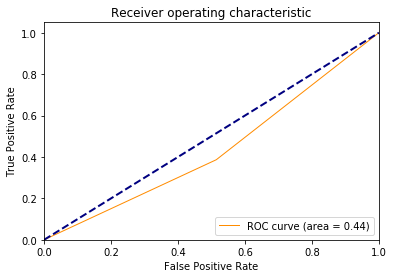

In [9]:
learning_rate =[1, 0.1, 0.01]
iteration=10000
for n in learning_rate:
    print("Learning Rate=" +str(n))
    weights = Batch_training(train_data, train_label, iteration, n )
    print('Weights=' +str(weights))
    predicted=accuracy(train_data, weights,train_label)
    print("Result on Test Data")
    predicted1=accuracy(test_data, weights,test_label)
    print('Roc Curve')
    Roc_curve(predicted, train_label)

In [10]:
#Online Training
def Online_training(input_data,train_label,iteration,learning_rate):
    bias = np.ones((train_data.shape[0],1))
    input_data = np.hstack((bias, train_data))
    weights= np.ones(input_data.shape[1])
    error_history=[]
    error2=0
    for iterating in range(iteration):
        scores = np.dot(input_data, weights)
        sig_line=sigmoid(scores)
        error1=cross_entropy(sig_line, train_label)
        error_history.append(error1)
        gradient = np.dot(input_data.T, (scores-train_label))/train_label.size
        weights -= gradient*learning_rate
        if error1==error2:
            print('Iteration= '+str(iterating)+ " Cost= "+ str(error1))
            break
        error2=error1 
    return(weights)
    

Learning Rate=0.1
Iteration= 470 Cost= 0.5559954537522217
weights[ 0.56981147  0.30314135 -0.3027044 ]
Accuracy from scratch: 0.6495
Result on Test Data
Accuracy from scratch: 0.653
Roc Curve
Accuracy  : 0.6495


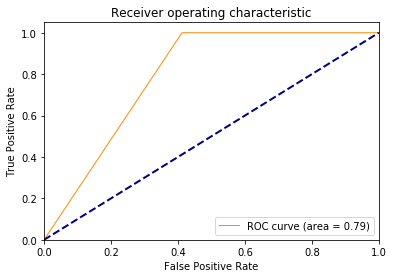

Learning Rate=0.01
Iteration= 4405 Cost= 0.5559954537521948
weights[ 0.56981147  0.30314135 -0.3027044 ]
Accuracy from scratch: 0.6495
Result on Test Data
Accuracy from scratch: 0.653
Roc Curve
Accuracy  : 0.6495


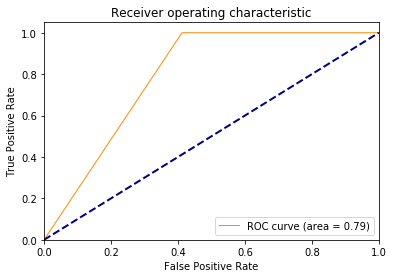

In [11]:
#learning Rate for Online training 
learning_rate =[0.1, 0.01]
iteration=10000
for n in learning_rate:
    print("Learning Rate=" +str(n))
    weights = Online_training(train_data, train_label, iteration, n )
    print('weights' +str(weights))
    predicted=accuracy(train_data, weights,train_label)
    print("Result on Test Data")
    predicted1=accuracy(test_data, weights,test_label)
    print('Roc Curve')
    Roc_curve(predicted, train_label)
    